---


# **IT Training Assignment Class 7**

---

### **Import Required Libraries**

In [12]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st
import yfinance as yf

### **Task 01: House Price Prediction System**

In [2]:
# Load dataset
df = pd.read_csv('house_data.csv')

In [3]:
''' Preprocessing '''

# Check for non-numeric columns (excluding the target variable 'price')
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")

# Convert categorical columns to numerical using one-hot encoding
if non_numeric_columns:
  df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Ensure 'price' column exists
if 'price' not in df.columns:
  raise KeyError("The dataset does not contain a 'price' column. Please check the CSV file.")

# Define features (X) and target (y)
X = df.drop(columns=['price']) # Features (all except target)
y = df['price'] # Target variable

# Ensure all feature columns are numeric
if not np.issubdtype(X.dtypes.values[0], np.number):
  raise ValueError("Some features are still non-numeric. Check the dataset preprocessing.")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Non-numeric columns: ['municipality_name', 'object_type_name']


In [4]:
''' Training & Prediction '''

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [5]:
''' Evaluation '''

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}')

Model Evaluation:
MSE: 149210817251.74, R-squared: 0.49


### **Task 02: Salary Prediction System**

In [6]:
# Load dataset (Replace 'salary_data.csv' with an actual dataset)
df = pd.read_csv('salary_data.csv')

In [7]:
''' Preprocessing '''

# Preprocess data
df.dropna(inplace=True)

# Identify categorical columns
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

# Apply one-hot encoding only if columns exist
if existing_categorical_columns:
  df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

In [10]:
# Define features and target variable
if 'Salary' in df.columns:
  X = df.drop(columns=['Salary'])
  y = df['Salary']

  # Split dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  ''' Prediction & Training '''

  # Train model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Predictions
  y_pred = model.predict(X_test)

  ''' Evaluation '''

  # Evaluate model
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f'MSE: {mse}, R-squared: {r2}')

  # Example prediction
  sample_input = X_test.iloc[[0]] # Keep feature names
  predicted_salary = model.predict(sample_input)
  print(f'Predicted Salary for sample input: {predicted_salary[0]}')

else:
  print("Error: The 'Salary' column is missing from the dataset.")

MSE: 49830096.85590839, R-squared: 0.9024461774180497
Predicted Salary for sample input: 115790.21011287419


### **Task 03: Stock Price Trend Prediction**


In [16]:
# Fetch stock data
def get_stock_data(ticker):
  stock = yf.Ticker(ticker)
  df = stock.history(period='5y')
  df = df[['Close', 'Volume']].dropna()
  df['Day'] = np.arange(len(df))
  return df

In [17]:
# Load dataset
ticker = 'AAPL' # Example stock symbol
df = get_stock_data(ticker)

# Define features and target variable
X = df[['Day', 'Volume']]
y = df['Close']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
''' Training & Prediction '''
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [19]:
''' Evaluation '''

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R-squared: {r2}')

MSE: 208.7255923670045, R-squared: 0.8165200440473471


In [38]:
%%writefile app.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st
import yfinance as yf

# Fetch stock data
def get_stock_data(ticker):
  stock = yf.Ticker(ticker)
  df = stock.history(period='5y')
  df = df[['Close', 'Volume']].dropna()
  df['Day'] = np.arange(len(df))
  return df

# Load dataset
ticker = 'AAPL' # Example stock symbol
df = get_stock_data(ticker)

# Define features and target variable
X = df[['Day', 'Volume']]
y = df['Close']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

''' Training & Prediction '''
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

''' Evaluation '''

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R-squared: {r2}')

# Streamlit app for visualization
st.title('Stock Price Trend Prediction')
st.write(f'Stock: {ticker}')
fig, ax = plt.subplots()
ax.plot(df['Day'], df['Close'], label='Actual Prices', color='blue')
ax.scatter(X_test['Day'], y_pred, label='Predicted Prices', color='red')
ax.set_xlabel('Day')
ax.set_ylabel('Stock Price')
ax.legend()
st.pyplot(fig)

# Prediction function
def predict_stock_price(day, volume):
  input_data = np.array([day, volume]).reshape(1, -1)
  return model.predict(input_data)[0]

# User input for prediction
st.sidebar.header('Predict Future Stock Price')
day = st.sidebar.number_input('Enter Future Day:', min_value=int(df['Day'].min()), max_value=int(df['Day'].max())+30)
volume = st.sidebar.number_input('Enter Expected Volume:',
min_value=int(df['Volume'].min()), max_value=int(df['Volume'].max()))
if st.sidebar.button('Predict'):
  prediction = predict_stock_price(day, volume)
  st.sidebar.write(f'Predicted Stock Price: ${prediction:.2f}')

Overwriting app.py


In [22]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 3s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [39]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.53.66.207:8501

your url is: https://pretty-files-join.loca.lt
MSE: 208.72831093151098, R-squared: 0.8165176464534749
MSE: 208.72824530855587, R-squared: 0.8165177101449523
MSE: 208.72820757358974, R-squared: 0.8165177412861977
MSE: 208.72823366610132, R-squared: 0.8165177302161418
MSE: 208.7282512500861, R-squared: 0.8165176989421882
MSE: 208.72823620659568, R-squared: 0.8165177207770702
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
  Stopping...
^C


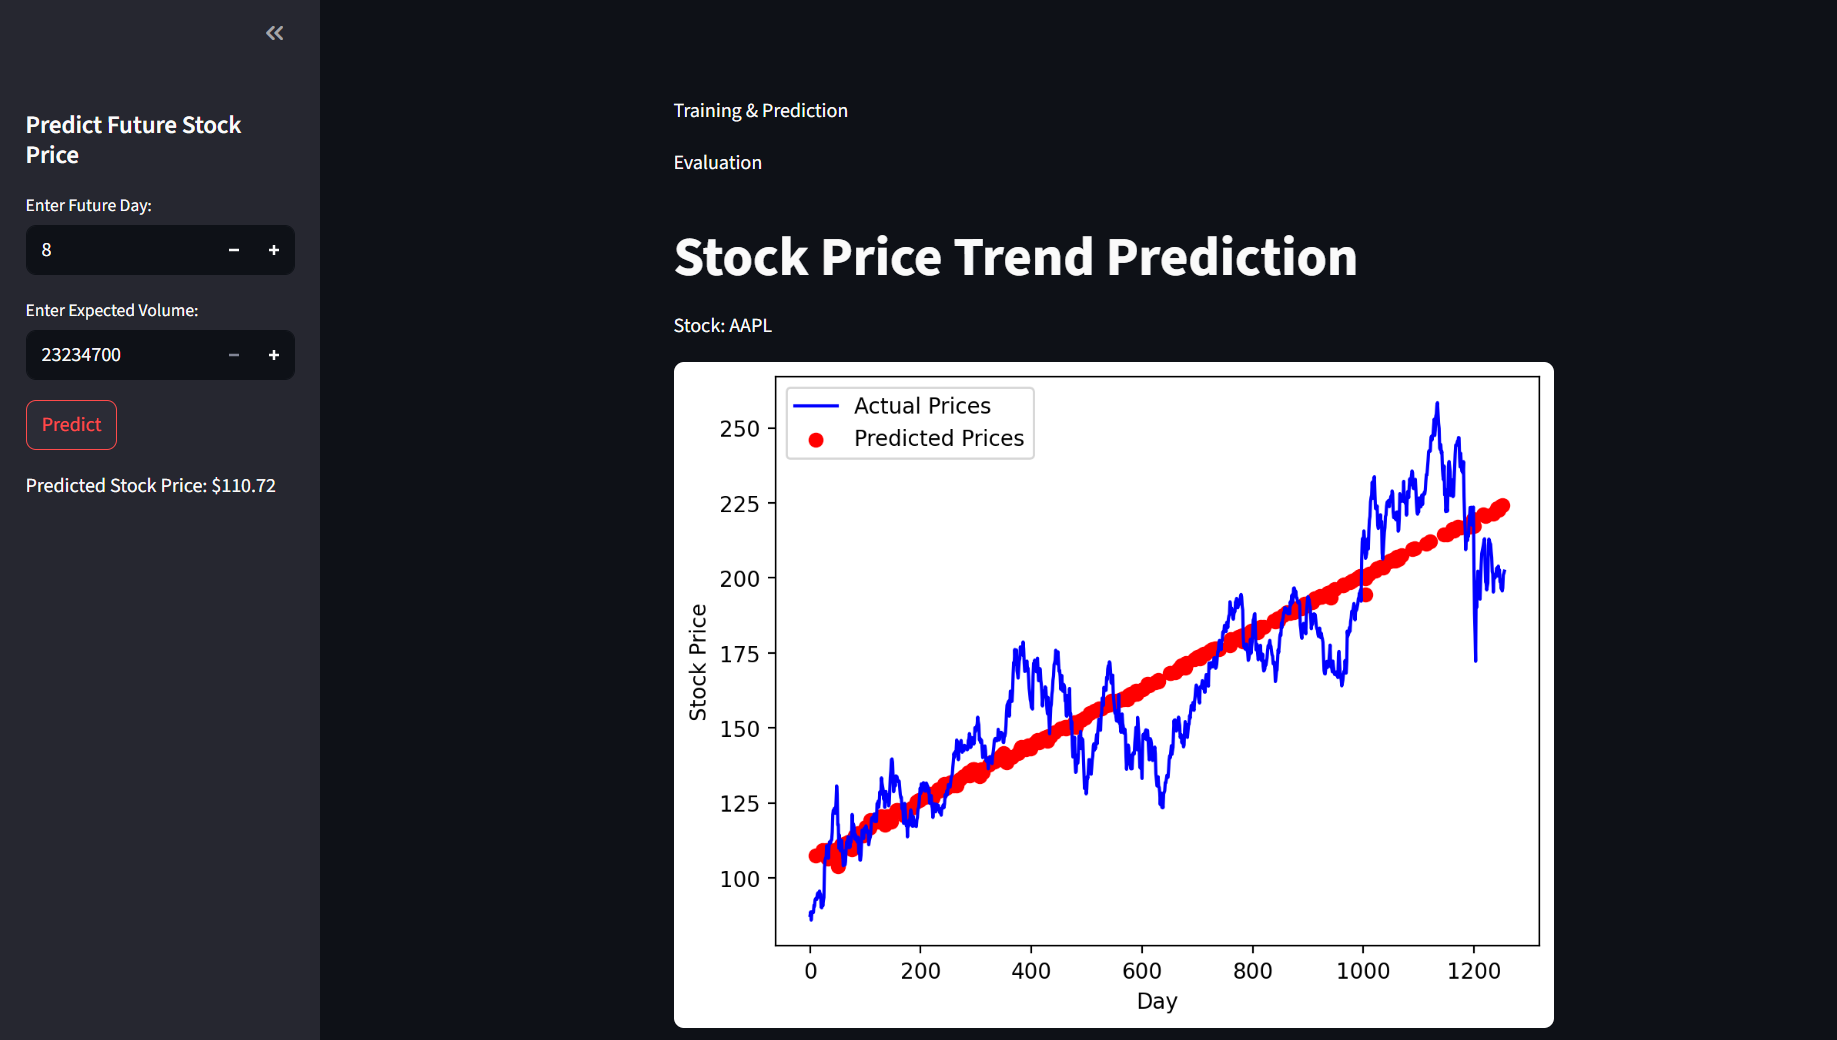

---

### **Task 04: Customer Churn Prediction for a Subscription Service**

In [50]:
%%writefile app.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import streamlit as st

# Load dataset
df = pd.read_csv('customer_churn_data.csv')

# Preprocess data
df.dropna(inplace=True) # Remove missing values

# Convert categorical columns to numerical
df = pd.get_dummies(df, columns=['Subscription Type', 'Contract Length'],
drop_first=True)

# Drop unnecessary columns
df.drop(columns=['Age', 'Gender', 'Tenure'], inplace=True)

# Define features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')
print(report)

# Streamlit app for visualization
st.title('Customer Churn Prediction')
st.write(f'Accuracy: {accuracy:.2f}')
# Confusion Matrix Visualization
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
st.pyplot(fig)

# User input for prediction
st.sidebar.header('Predict Customer Churn')
features = {col: st.sidebar.number_input(f'Enter {col}:',
float(X[col].min()), float(X[col].max())) for col in X.columns}
if st.sidebar.button('Predict'):
  input_data = np.array([features[col] for col in X.columns]).reshape(1, -1)
  prediction = model.predict(input_data)[0]
  st.sidebar.write(f'Predicted Churn: {"Yes" if prediction == 1 else "No"}')

Overwriting app.py


In [53]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.53.66.207:8501

⠴⠦your url is: https://yummy-mammals-behave.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Accuracy: 0.85

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6793
           1       0.84      0.83      0.84      6082

    accuracy                           0.85     12875
   macro avg       0.84 

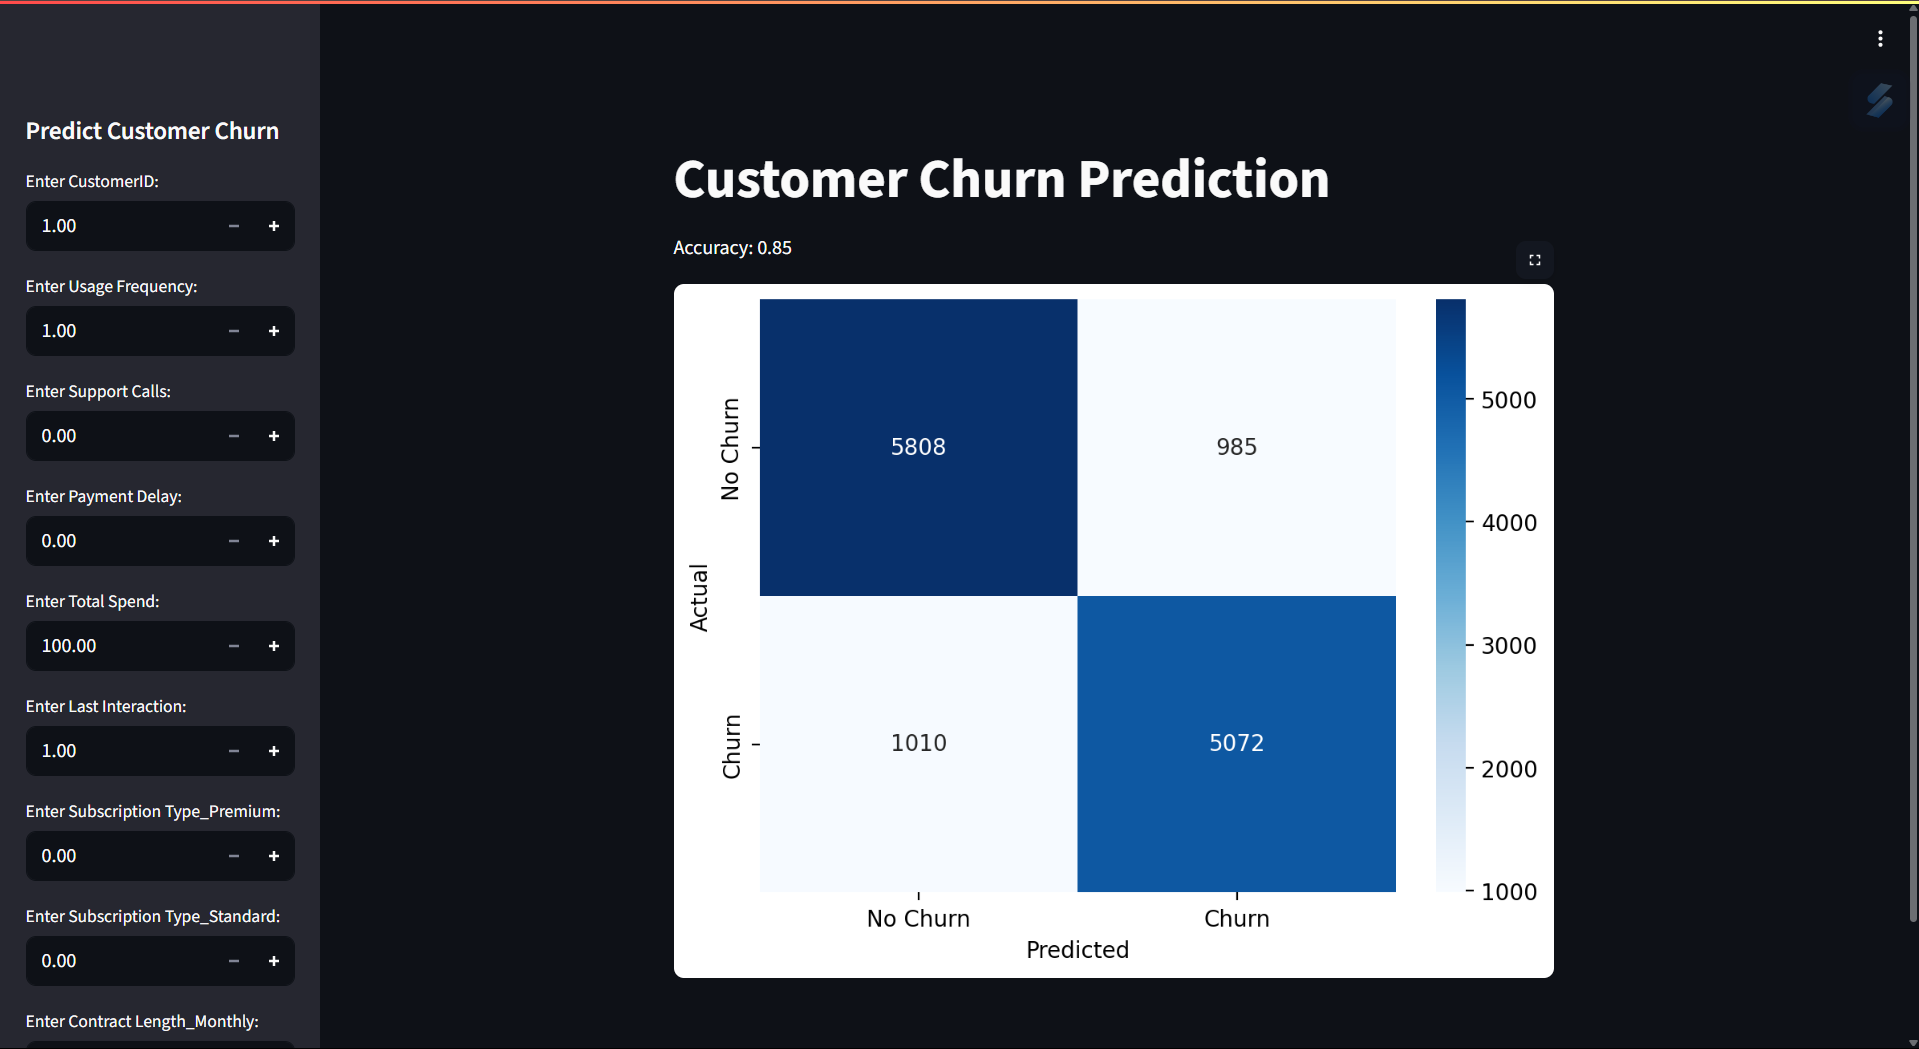

---

### **Task 05: Energy Consumption Prediction**

In [56]:
%%writefile app.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st

# Load dataset
file_path = "owid-energy-data.csv"
df = pd.read_csv(file_path)

# Display column names to check the correct column name for energy consumption
st.write("Dataset Columns:", df.columns.tolist())

# Identify the correct column for energy consumption
energy_columns = [col for col in df.columns if "consumption" in col.lower()]
if not energy_columns:
  raise KeyError("No column related to energy consumption found in the dataset.")

# Use the first identified energy consumption column
energy_column = energy_columns[0]
st.write(f"Using '{energy_column}' as the target variable.")

# Preprocess data
df.dropna(inplace=True)

# One-hot encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
  df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target variable
X = df.drop(columns=[energy_column])
y = df[energy_column]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Streamlit app
st.title('Energy Consumption Prediction')
st.write(f'MSE: {mse:.2f}, R-squared: {r2:.2f}')

# Visualization
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.5, color='blue')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax.set_xlabel('Actual Energy Consumption')
ax.set_ylabel('Predicted Energy Consumption')
st.pyplot(fig)

# User input for prediction
st.sidebar.header('Predict Energy Consumption')
features = {col: st.sidebar.number_input(f'Enter {col}:',
float(df[col].min()), float(df[col].max())) for col in X.columns}
if st.sidebar.button('Predict'):
  input_data = np.array([features[col] for col in X.columns]).reshape(1, -1)
  prediction = model.predict(input_data)[0]
  st.sidebar.write(f'Predicted Energy Consumption: {prediction:.2f} kWh')

Overwriting app.py


In [57]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.53.66.207:8501

your url is: https://fresh-parks-lead.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
  Stopping...
^C


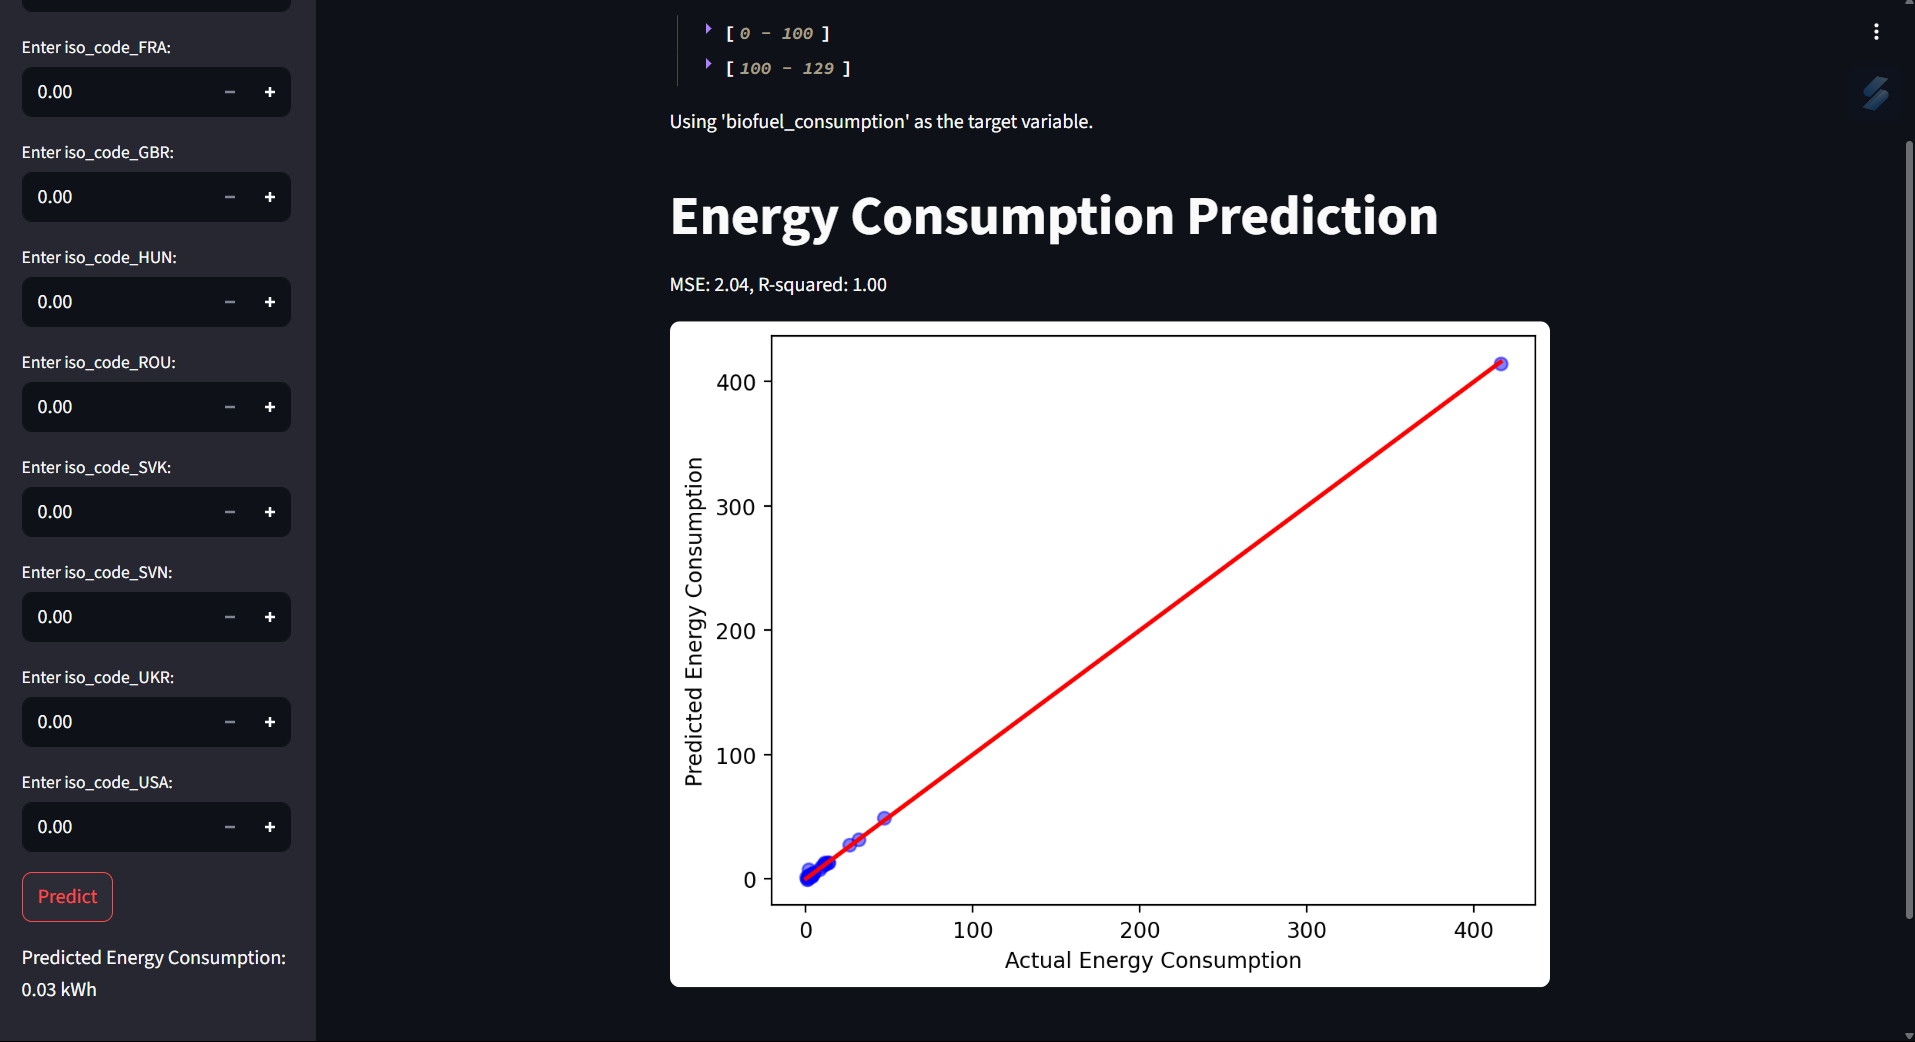

---